<a href="https://colab.research.google.com/github/ValNeira19/lab2/blob/main/Laboratorio_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 8: Implementación algoritmo de regresión lineal
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2440 Programación científica**

**Nombres de los integrantes**


1.   Valeria Neira 
2.   Nombre integrante 2

**Número del grupo**

*Escribir el número del grupo*

# **Regresión lineal**

Considere el conjunto de puntos:\
 $(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), ... , (x^{(m)},y^{(m)})$,

donde se asume que se relacionan a través de la ecuación:
\begin{align*}
  y^{(i)} \approx β_{1} + &x^{(i)}β_{2}\\
 \end{align*}
Encontrar $\beta=[\beta_1,\beta_1]^T$ se resuelve a través de la solución del problema de mínimos cuadrados:
\begin{align*}
  \min_\beta ||y-H\beta||_2^2,
 \end{align*}
donde $y$ y $H$ se contruyen a partir de los datos como se vio en clase. La solución analítica de este problema tiene la forma:
\begin{align*}
  \beta^* =  (H^TH)^{-1}H^Ty
 \end{align*}
 
Ahora, sigua los siguientes pasos:

1. Teniendo en cuenta los datos anexados en la actividad en archivo excel, use la libreria *pandas* para procesarlos y trabajar con ellos. La primera columna corresponde a los valores de $x$ y la segunda a los valores de $y$.


In [4]:
import numpy as np
import pandas as pd 
from numpy.linalg import inv
from numpy.linalg import norm
import matplotlib.pyplot as plt

tabla = pd.read_excel(r'data.xlsx', header= None)
print (tabla)

        0          1
0     0.0   3.191590
1     0.1  -1.735428
2     0.2  -0.347611
3     0.3  -0.626006
4     0.4   1.867975
..    ...        ...
96    9.6  43.227739
97    9.7  43.686057
98    9.8  48.793988
99    9.9  52.387736
100  10.0  52.806588

[101 rows x 2 columns]


2. Construya la matriz $H$ y el vector $y$.

In [12]:
tb = tabla.to_numpy()

x = tb[:,0]
y = tb[:,1]

unos = np.ones(101)
H = np.vstack((unos,x))

H = H.T

print (H)

[[ 1.   0. ]
 [ 1.   0.1]
 [ 1.   0.2]
 [ 1.   0.3]
 [ 1.   0.4]
 [ 1.   0.5]
 [ 1.   0.6]
 [ 1.   0.7]
 [ 1.   0.8]
 [ 1.   0.9]
 [ 1.   1. ]
 [ 1.   1.1]
 [ 1.   1.2]
 [ 1.   1.3]
 [ 1.   1.4]
 [ 1.   1.5]
 [ 1.   1.6]
 [ 1.   1.7]
 [ 1.   1.8]
 [ 1.   1.9]
 [ 1.   2. ]
 [ 1.   2.1]
 [ 1.   2.2]
 [ 1.   2.3]
 [ 1.   2.4]
 [ 1.   2.5]
 [ 1.   2.6]
 [ 1.   2.7]
 [ 1.   2.8]
 [ 1.   2.9]
 [ 1.   3. ]
 [ 1.   3.1]
 [ 1.   3.2]
 [ 1.   3.3]
 [ 1.   3.4]
 [ 1.   3.5]
 [ 1.   3.6]
 [ 1.   3.7]
 [ 1.   3.8]
 [ 1.   3.9]
 [ 1.   4. ]
 [ 1.   4.1]
 [ 1.   4.2]
 [ 1.   4.3]
 [ 1.   4.4]
 [ 1.   4.5]
 [ 1.   4.6]
 [ 1.   4.7]
 [ 1.   4.8]
 [ 1.   4.9]
 [ 1.   5. ]
 [ 1.   5.1]
 [ 1.   5.2]
 [ 1.   5.3]
 [ 1.   5.4]
 [ 1.   5.5]
 [ 1.   5.6]
 [ 1.   5.7]
 [ 1.   5.8]
 [ 1.   5.9]
 [ 1.   6. ]
 [ 1.   6.1]
 [ 1.   6.2]
 [ 1.   6.3]
 [ 1.   6.4]
 [ 1.   6.5]
 [ 1.   6.6]
 [ 1.   6.7]
 [ 1.   6.8]
 [ 1.   6.9]
 [ 1.   7. ]
 [ 1.   7.1]
 [ 1.   7.2]
 [ 1.   7.3]
 [ 1.   7.4]
 [ 1.   7.5]
 [ 1.   7.6]

3. Encuentre los valores de $\beta^*$.

In [11]:
t1 = (H.T @ H)
t1_inv = np.linalg.inv(t1)

beta = t1_inv @ H.T @ y

print (beta)

[0.07893785 5.09970266]


4. Grafique la recta obtenida junto a los datos anexados.

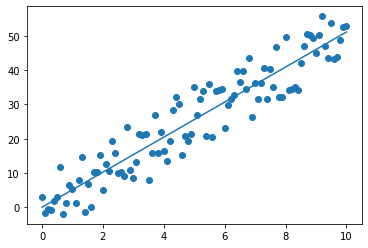

In [15]:
x_grafica = np.linspace(0,10,1000)
y_grafica = beta[0] + beta[1]*x_grafica

plt.plot(x_grafica, y_grafica)
plt.scatter(x,y)

5. Con los coeficientes hallados, se desea comparar el error con otras dos parejas de coeficientes:

 - $\beta_a=[\beta_1^*+5, \beta_2^*-1]^T$
 - $\beta_b=[\beta_1^*-5, \beta_2^*+1]^T$.

Determine el valor de:

  \begin{align*}
  ||y-H\beta||_2^2
 \end{align*}

para $\beta^*$, $\beta_a$, y $\beta_b$. Aquí los valores de $y$ y $H$ son los mismos para todos ya que los datos no cambian. Explique los resultados obtenidos. 

In [22]:
M = y -(H@beta) 
n = (norm(M,2))**2


b_a = np.array([ beta[0]+5 , beta[1] - 1])
b_a = b_a.T

b_b = np.array([ beta[0]-5 , beta[1] + 1])
b_b = b_b.T

M_1 = y -(H@b_a) 
n_1 = (norm(M_1,2))**2

M_2 = y -(H@b_b) 
n_2 = (norm(M_2,2))**2

print(n, n_1, n_2)

2905.840606119537 3764.3406061195483 3764.3406061195255


6. Grafique el las tres rectas (es decir, las obtenidas por $\beta^*$, $\beta_a$, y $\beta_b$)  junto a los datos anexados. En un scatter plot pinte los datos en el archivo, y pinte las tres rectas traslapadas con tres colores diferentes. Interprete los resultados obtenidos.

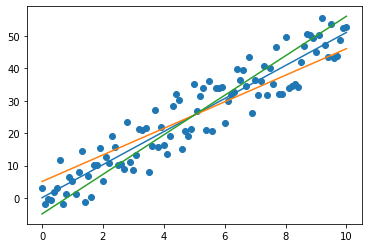

In [25]:
x_grafica = np.linspace(0,10,1000)
y_grafica = beta[0] + beta[1]*x_grafica

x1_grafica = np.linspace(0,10,1000)
y1_grafica = b_a[0] + b_a[1]*x1_grafica

x2_grafica = np.linspace(0,10,1000)
y2_grafica = b_b[0] + b_b[1]*x2_grafica

plt.plot(x_grafica, y_grafica)
plt.plot(x1_grafica, y1_grafica)
plt.plot(x2_grafica, y2_grafica)
plt.scatter(x,y)

tenienod en cuenta que se quiere encontrar un beta que minimice la distancia de nuestos datos se puede decir que los valores de los betas calculados inicialmente con el metodo de minimos cuadrados [0.07893785 5.09970266] es el mas optimo para este caso. Por el contrario, los otros dos valores de beta ( 𝛽𝑎 y 𝛽𝑏 ) presentan una una mayor norma lo que significa que nos son los mas optimos. 